<a href="https://colab.research.google.com/github/maaniaxs/Deep-Learning/blob/main/Amazon_alexa_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd, numpy as np
from textblob import Word
from sklearn.preprocessing  import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [17]:

import nltk
from nltk.corpus import stopwords

import  string
stop_word= stopwords.words('english')
punct = string.punctuation

from nltk.stem import WordNetLemmatizer
lemmatize= WordNetLemmatizer()
import re

from nltk.tokenize import word_tokenize, sent_tokenize


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import tensorflow
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [5]:
#from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import pad_sequences

In [6]:
# Loading the dataset
data = pd.read_csv('/content/amazon_alexa.tsv', sep='\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
data.shape  # checking the shape

(3150, 5)

In [8]:
# creating a new column sentiment based on overall rating
data['sentiment'] = np.where(data['rating']<=3, 'negative', 'positive')

In [9]:
data.sample(7)

,rating,date,variation,verified_reviews,feedback,sentiment
2628,1,30-Jul-18,White Dot,,0,negative
316,5,29-Jul-18,Charcoal Fabric,I am impressed with the sound quality.,1,positive
1396,5,15-Jul-18,Black Spot,Gift for husband. Great!,1,positive
2055,4,10-Jul-18,White Plus,I really haven’t found any difference between ...,1,positive
481,5,27-Jun-18,Black,I got this for my mom . She loves it !,1,positive
2499,4,30-Jul-18,White Dot,It plays music that I request.,1,positive
1364,2,19-Jul-18,Black Spot,"It's not as good as Siri, BUT it still has som...",0,negative


In [10]:
# check whether there are any null values or not
data_v1 = data[['verified_reviews', 'sentiment']]
data_v1.isnull().sum()

verified_reviews    0
sentiment           0
dtype: int64

In [11]:
# check there are how many types of values and how much are
data['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [18]:
# convert all message to lower case
data_v1['verified_reviews']= data_v1['verified_reviews'].str.lower()

def clean_data(message):
    text= re.sub(r"n\'t", ' not', message)
    text= re.sub(r'https?:\S+|www.\S+','',text) # remove hyperlink
    text= re.sub(r'\£+|\$+', ' dollars ', text)
    text=re.sub(r'\d{10,}', ' number ',text)
    text= re.sub(r"'", " ' ", text)
    text= re.sub(r'"', ' " ', text)  
    text= re.sub(r"\'ve", ' have', text)
    text= re.sub(r"\'m", ' am', text)
    text= re.sub(r"\'re", ' are', text)
    text= re.sub("\'s", 's', text)
    text= re.sub('[^A-Za-z]+',' ', text)
    text= re.sub("\s+",' ', text)
    return text
    #text=  [word_tokenize(i) for i in sent_tokenize(text)]
    #text= ' '.join(e for e in text.split(' ') if e not in stop_word ) #
    return text

<ipython-input-18-cec29d32b598>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v1['verified_reviews']= data_v1['verified_reviews'].str.lower()


In [19]:
from tqdm import tqdm
preprocess=[]
for var in tqdm(data_v1['verified_reviews'].values):
    sent= clean_data(var)
    sent= ' '.join(e for e in sent.split() if e not in stop_word) #
    sent= ' '.join(lemmatize.lemmatize(e) for e in sent.split()) #
    preprocess.append(sent.strip())
data_v1['verified_reviews'] = preprocess

100%|██████████| 3150/3150 [00:02<00:00, 1283.86it/s]
<ipython-input-19-b6ee800e2c50>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v1['verified_reviews'] = preprocess


In [20]:
data_v1.head(6)

,verified_reviews,sentiment
0,love echo,positive
1,loved,positive
2,sometimes playing game answer question correct...,positive
3,lot fun thing yr old learns dinosaur control l...,positive
4,music,positive
5,received echo gift needed another bluetooth so...,positive


In [45]:
data_v1['sentiment'].value_counts()

1    2741
0     409
Name: sentiment, dtype: int64

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

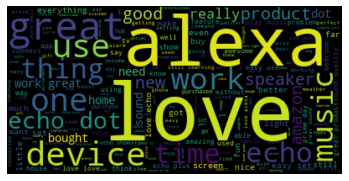

In [21]:
import wordcloud
common_word = ''
for i in data_v1.verified_reviews:
  i = str(i)
  tokens = i.split()
  common_word += ' '.join(tokens)+' '
wordcloud = wordcloud.WordCloud().generate(common_word)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [22]:
# Encoded the target column
lb = LabelEncoder()
data_v1['sentiment'] = lb.fit_transform(data_v1['sentiment'])

<ipython-input-22-3018ff65f893>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v1['sentiment'] = lb.fit_transform(data_v1['sentiment'])


In [26]:
# apply keras tokwnizer for converting text to numeric form
tokenizer = Tokenizer(num_words=None,split=' ')
tokenizer.fit_on_texts(data_v1['verified_reviews'].values)

X = tokenizer.texts_to_sequences(data_v1['verified_reviews'].values)
X = pad_sequences(X, maxlen=80)
X[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2], dtype=int32)

In [27]:
print('vocabulary size',len(tokenizer.word_index))

vocabulary size 3483


In [49]:
# Building a model Sequential model by using Keras

model = Sequential()
model.add(Embedding(3490, 32, input_length = 80))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(160))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 80, 32)            111680    
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 80, 32)           0         
 lDropout1D)                                                     
                                                                 
 lstm_6 (LSTM)               (None, 160)               123520    
                                                                 
 dense_6 (Dense)             (None, 24)                3864      
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 239,089
Trainable params: 239,089
Non-trainable params: 0
________________________________________________

In [47]:
# Splitting the dataset into Train & Test part
#y = pd.get_dummies(data_v1['sentiment'])
x_train, x_test, y_train, y_test = train_test_split(X, data_v1['sentiment'], test_size=0.25, random_state= 42)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [51]:
# 
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
74/74 [==============================] - 1s 11ms/step - loss: 0.0330 - accuracy: 0.9860 - val_loss: 0.3969 - val_accuracy: 0.9023
Epoch 2/10
74/74 [==============================] - 1s 10ms/step - loss: 0.0347 - accuracy: 0.9831 - val_loss: 0.4211 - val_accuracy: 0.9099
Epoch 3/10
74/74 [==============================] - 1s 10ms/step - loss: 0.0278 - accuracy: 0.9890 - val_loss: 0.4520 - val_accuracy: 0.9112
Epoch 4/10
74/74 [==============================] - 1s 10ms/step - loss: 0.0298 - accuracy: 0.9865 - val_loss: 0.3902 - val_accuracy: 0.9112
Epoch 5/10
74/74 [==============================] - 1s 9ms/step - loss: 0.0305 - accuracy: 0.9886 - val_loss: 0.4329 - val_accuracy: 0.9086
Epoch 6/10
74/74 [==============================] - 1s 10ms/step - loss: 0.0255 - accuracy: 0.9886 - val_loss: 0.4769 - val_accuracy: 0.9099
Epoch 7/10
74/74 [==============================] - 1s 10ms/step - loss: 0.0273 - accuracy: 0.9886 - val_loss: 0.4616 - val_accuracy: 0.9124
Epoch 8/10
74/

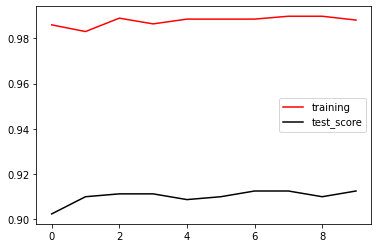

In [56]:
##  plotting Model history
plt.plot(history.history['accuracy'], color= 'red', label= 'training')
plt.plot(history.history['val_accuracy'], color= 'k', label= 'test_score')
plt.legend()
plt.show()

In [55]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])